In [21]:
#adapted from two articles on Medium
import time
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [22]:
style.use('ggplot')

In [23]:
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2017, 12, 31)

In [24]:
#can replace AAPL with GOOG, AMZN, FB, etc.
prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']
returns = prices.pct_change()

In [25]:
last_price = prices[-1]

In [26]:
#Number of Simulations
num_simulations = 10000
num_days = 252
#strike price
strike_price = 40

In [27]:
total_sim = pd.DataFrame()

In [28]:
simulation_df = pd.DataFrame()

daily_vol = returns.std()

for x in range(num_simulations):
    count = 0
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series

In [29]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,42.566284,42.066306,42.218235,42.678013,42.822232,41.873040,42.591236,42.391373,42.092241,42.134452,...,41.558737,43.019507,42.046743,42.492038,43.203341,42.039751,42.331616,41.992814,41.960484,42.325330
1,41.946925,41.671089,42.863428,42.374468,43.763490,41.795467,41.935745,42.415195,42.501010,42.498984,...,41.635764,43.339064,41.962558,42.158350,42.599360,42.101338,42.896354,41.709498,42.002644,42.706587
2,41.765242,41.892366,43.011658,42.317434,43.168532,42.726293,42.439990,43.204215,41.887151,42.790500,...,41.937532,43.383284,41.572854,42.640807,42.299017,41.588259,43.261931,40.783280,41.764987,43.145661
3,41.223252,42.252842,43.395036,42.281946,43.230959,41.924715,42.109286,42.967004,40.946818,42.812862,...,41.729577,44.186025,41.969443,41.985071,42.356208,41.654658,43.257428,41.113514,41.760820,44.026411
4,40.761507,43.253813,43.358023,42.542871,43.883552,42.182866,41.762163,43.195112,41.293618,43.141718,...,41.621702,44.979843,42.283927,42.011419,41.979196,41.618632,43.578572,41.231592,42.031509,43.553372
5,41.578254,43.314460,42.909239,43.412171,43.651559,42.130405,41.539852,43.779250,41.675122,42.865370,...,41.448323,45.664573,42.671853,41.498191,42.136729,40.771595,43.772188,41.134109,42.863370,43.323564
6,41.379957,43.091084,42.861097,44.024694,43.897864,42.708425,41.927971,43.393964,41.759183,42.801871,...,41.163321,44.975936,42.479374,41.291232,42.274872,40.750030,44.230882,40.394376,43.137677,43.190935
7,41.163886,44.282033,42.953340,43.809132,44.019896,42.182709,41.821266,43.174675,41.799117,42.311298,...,40.933331,44.607309,42.426823,40.798824,42.286018,39.976839,44.616190,40.122169,43.068085,43.411113
8,41.658317,43.532739,42.858130,43.845339,43.765368,41.719228,41.573257,42.977065,42.040667,42.370205,...,40.709268,44.723288,42.214270,40.559193,42.101042,40.006711,43.931469,40.462187,43.393035,42.877507
9,41.163353,43.493266,42.800273,43.583772,44.399836,42.377577,41.779055,42.766286,42.603517,42.582110,...,41.392582,44.998339,42.107781,41.559924,41.764373,40.307825,44.090399,40.052002,44.015239,43.166798


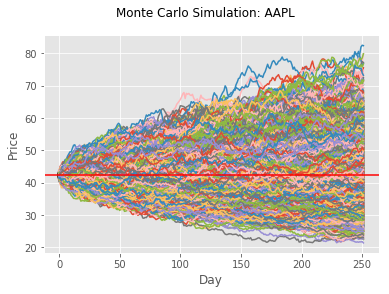

In [30]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

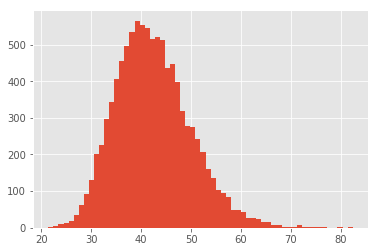

In [31]:
final_prices = simulation_df.T[num_days - 1]
plt.hist(final_prices, 60)
plt.show()

In [32]:
diff = final_prices - strike_price
for i in range(num_simulations - 1):
    if diff[i] < 0:
        diff[i] = 0

In [33]:
#price of a call option
call = np.mean(diff)
call

4.241635969264072

In [34]:
diff2 = strike_price - final_prices
for i in range(num_simulations - 1):
    if diff2[i] < 0:
        diff2[i] = 0

In [35]:
#price of a put option
put = np.mean(diff2)
put

1.8462653041156187